### Assignment 3 - Neural Networks

Manisha Sathanur <br/>
801069595

# I. Overview

The main objective of this assignment is to implement Non Linear Regression and  Nonlinear Logistic Regression models using Neural Networks and test it on my data to analyse its performance. We need to implement the NeuralNet Class which is used to implement the Neural network and build a fine regression model. The second objective is to implement cross validation from scratch and use it to find the best neural network model which best fits regression data. 
We need to Visualize the data, plot the distribution of data, preprocess the data and also Analyze the prediction results and compare the results with other linear regression model.

## Data Introduction
__The dataset is a sample of the transactions made in a retail store taken from kaggle.
The store wants to know  the customer purchase behaviour against different products. We can use 
regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.__

### The dataset consists of the following attributes:
- User_ID: id of User
- Product_ID: Id Product
- GenderBoolean: gender of each user
- Age: customer age
- OccupationId: Occupation of each customer
- City_Category: There are 3 A, B and C. each custormer belongs to one of these 3
- Stay_In_Current_City_Years: since when the custormer is staying in the current city. The values are 1, 2,3 or 4+
- Marital_Status: marital status of each custormer is married or unmarried
- Product_Category_1
- Product_Category_2
- Product_Category_3
- Purchase: Purchase amount in dollars. This is the output variable.

## Data Reading 
Read data from .csv file using pandas

In [137]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [138]:
dataset=pd.read_csv(r'C:\Users\Manisha\Desktop\Subjects\ML\Assignment01_801069595\blackfriday.csv')
#dataset=pd.read_csv("blackfriday.csv")
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Obervation: the data set contains missing values NaN for Product_Category_1 and Product_Category_2. these values need to be handled as part of data preprossing.

 ## DATA PREPROSSING
- __Rename attribute names for consistency by removing special characters from them__ 
- __Change all variable types to number as we are dealing with regrression which would need values in the form of numbers__
- __Handle missing values for Product_Category_1 and Product_Category_2__
- __Change cityCategory to catogorical as we have 3 citites A, B and C the catogorical values would be 1, 2 and 3__ 
- __Change marital_status to binary that is married is 1 and unmarried is 0__
- __Change the value of 4+ in the attribute stay_in_current_city_year to 4__

In [139]:
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [140]:
#convert column headers to lower case
#remove special characters from cloumn header and rename few cloumns 
dataset.columns = ['userid', 'productid', 'gender', 'age', 'occupation', 'citycategory',
       'stayyearscity', 'maritalstatus', 'prodcat1',
       'prodcat2', 'prodcat3', 'purchase']

### Replace 0s and 1s in the Marital status column in order to make the attribute binary

In [141]:
dataset['maritalstatus'] = dataset['maritalstatus'].replace(0, 'Unmarried')
dataset['maritalstatus'] = dataset['maritalstatus'].replace(1, 'Married')
dataset.dtypes

userid             int64
productid         object
gender            object
age               object
occupation         int64
citycategory      object
stayyearscity     object
maritalstatus     object
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

### The stayyearscity contians 4+ which needs to be replaced to 4 . This will make the attribute catagorical

In [142]:
dataset_orig = dataset.copy()

In [143]:
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

## Encoding the columns to make the data fit for regression

In [144]:
# Encoding columns 
dataset['productid'] = encode_x.fit_transform(dataset['productid'])
dataset['gender'] = encode_x.fit_transform(dataset['gender'])
dataset['age'] = encode_x.fit_transform(dataset['age'])
dataset['citycategory'] = encode_x.fit_transform(dataset['citycategory'])
dataset['maritalstatus'] = encode_x.fit_transform(dataset['maritalstatus'])
dataset['stayyearscity'] = encode_x.fit_transform(dataset['stayyearscity'])

__replacing the 'NaN' with 0s and can be assumed as 'missing' category value__

In [145]:
dataset['prodcat2'].fillna(value=0,inplace=True)
dataset['prodcat3'].fillna(value=0,inplace=True)
# check for missing values (NaN) in the dataset
dataset.isna().any()

userid           False
productid        False
gender           False
age              False
occupation       False
citycategory     False
stayyearscity    False
maritalstatus    False
prodcat1         False
prodcat2         False
prodcat3         False
purchase         False
dtype: bool

In [146]:
dataset['stayyearscity'] = dataset['stayyearscity'].replace('4+', 4)
dataset.dtypes

userid             int64
productid          int32
gender             int32
age                int32
occupation         int64
citycategory       int32
stayyearscity      int64
maritalstatus      int32
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

## Visualisations
__to get the column labels instead of 0's and 1's we can use the dataset_orig for visualisation__

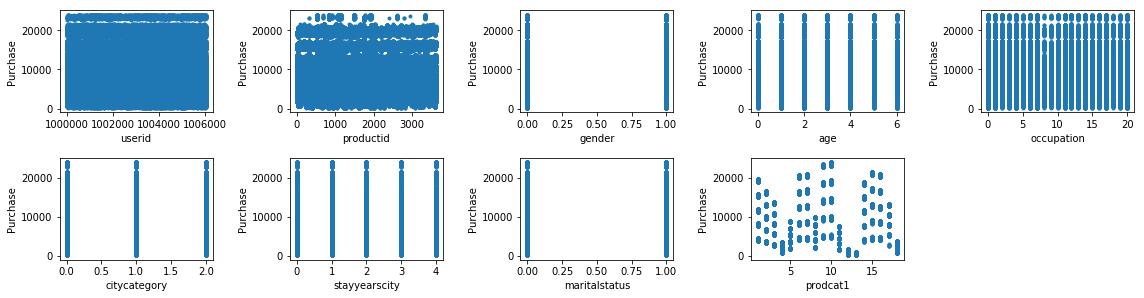

In [147]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(6, 5, i+1)
    plt.plot(dataset.iloc[:,i],dataset.purchase, '.')
    plt.xlabel(dataset.columns.values[i])
    plt.ylabel("Purchase")
fig.tight_layout()

In [148]:
group_1 = dataset.groupby(['gender'])
group_2 = dataset.groupby(["age"])
group_3 = dataset.groupby(["citycategory"])
group_4 = dataset.groupby(["occupation"])

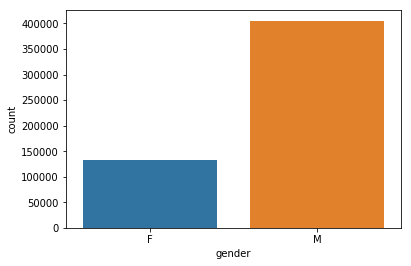

In [149]:
sb.countplot(dataset_orig['gender'])


 ## Observations: 
__it can be seen from the above bar graph that the number of male are more then the number of female shoppers
for this retail store__

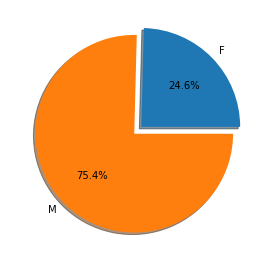

In [150]:
plt.figure(figsize=(15,10))

# Pie chart for gender distribution
plt.subplot(2,2,1)
gender_count = [dataset_orig.gender[dataset_orig['gender']=='F'].count(),
                dataset_orig.gender[dataset_orig['gender']=='M'].count()]
gender_lab = dataset_orig.gender.unique()
expl = (0.1,0)
plt.pie(gender_count, labels=gender_lab, explode=expl, shadow=True , autopct='%1.1f%%');

## Observations:
__aproximately 75% of the total shoppers where male and the remianing 25% where female shopper__

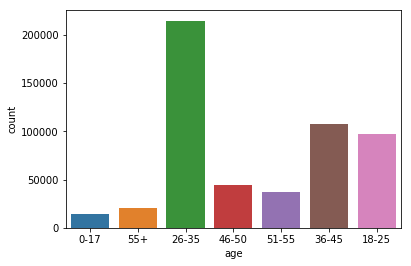

In [151]:
sb.countplot(dataset_orig['age'])

## Observations: 
__from the above graph it can be seen that the people between the age of 26 to 35 vistied the store most during blackfriday but this not mean that people in that age group have spend the most.__

In [163]:
from matplotlib import *
import sys
from pylab import *

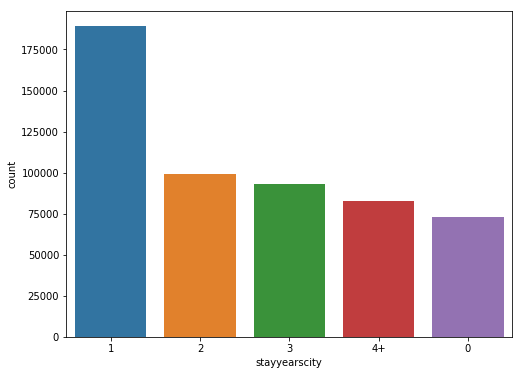

In [164]:
plt.figure(figsize=(8,6))
ordr2 =dataset_orig.groupby(["stayyearscity"]).count().sort_values(by='purchase',ascending=False).index
sb.countplot(dataset_orig['stayyearscity'], label=True, order=ordr2)
plt.show()

## Observations:
__people who have started staying in their respective cities since just a year have visited the store more. As the number of years they have stayed increased the purchase rate decreased.
This could be because people who are new tend to explore and roam around more as one gets settled they might prefer to stay home.
Another reason could be that the people new could need to buy more inorder to settle in to they new home.__

In [169]:
#Creating new column in the dataset 
dataset_orig['gender_maritalstatus'] = dataset_orig.apply(lambda x:'%s_%s' % (x['gender'],x['maritalstatus']),axis=1)
dataset_orig.gender_maritalstatus.unique()

array(['F_Unmarried', 'M_Unmarried', 'M_Married', 'F_Married'],
      dtype=object)

In [168]:
#group by for gender and marital status
group_5 = dataset_orig.groupby(["gender_maritalstatus"])

## Observation : 
__from chart above the number of unmarried shoppers are more then the married shoppers for both male and female. As unmarried people tend to have more time to shop then people who are married__

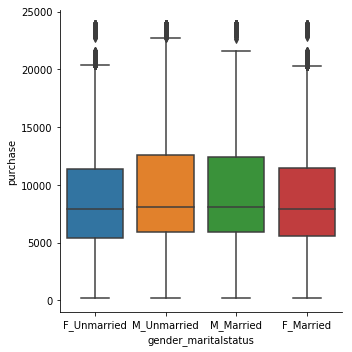

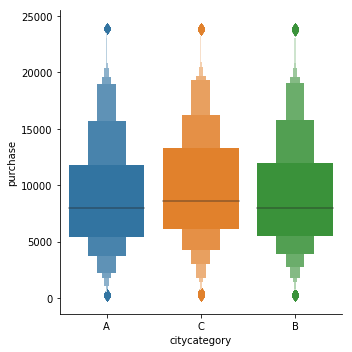

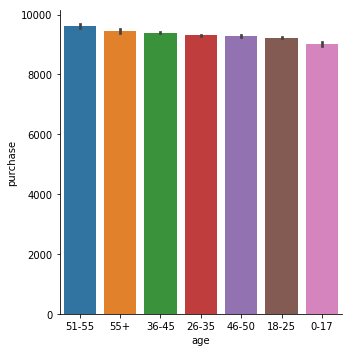

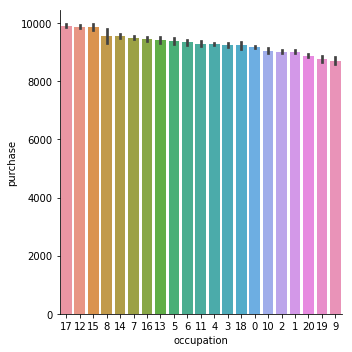

In [171]:
#bar chart for purchase vs (age,occupation, marritial status and city)
sb.catplot(x='gender_maritalstatus', y='purchase', data=dataset_orig, kind='box')

sb.catplot(x='citycategory', y='purchase', data=dataset_orig, kind='boxen')
ordr_occ =dataset_orig.groupby(["age"]).mean().sort_values(by='purchase',ascending=False).index
sb.catplot(x='age', y='purchase', order=ordr_occ, data=dataset_orig, kind='bar')

ordr_occ =dataset_orig.groupby(["occupation"]).mean().sort_values(by='purchase',ascending=False).index
sb.catplot(x='occupation', y='purchase', order=ordr_occ, data=dataset_orig, kind='bar')
plt.show()

## Observations :
- __Males spend more than females__
- __Age factor : People who have earned more (spend more time working) and have saved enough money, tend to spend more then the other shoppers. The least spenders are from the age 0-17.This could be because__ 
- __Occupation codes 17, 12 and 15 appears to be earning more and accordingly spend more__
- __People living in Category C city appears to spend more in the mall__

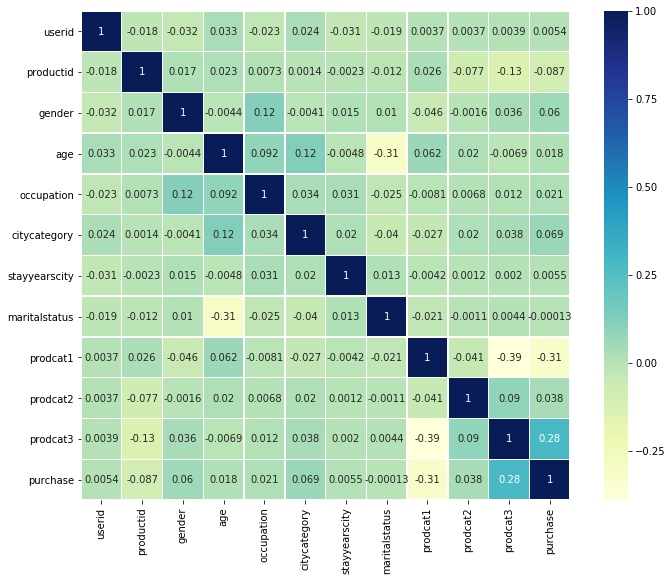

In [172]:
correlation = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(correlation, vmax=1, cmap="YlGnBu", square=True,linewidths=.5, annot=True)
plt.show()

## Observations:
__from the correlation matrix it can be seen that citycategory and gender and the most correlated columns to purchase__

# III. Methods

II.A 5-fold Cross Validation
Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies.
III.B Nonlinear Regression
Summarize the nonlinear regression model.
Use the NeuralNet class for regression to apply to your data.
Explain your codes (not in comment).
III.C Nonlinear Logistic Regression
Summarize the nonlinear logistic regression model.
Finish the following NeuralNetLogReg class.
Check if your codes works well with toy synthetic data.
Apply to your classification data.
Explain your codes (not in comment). 

# Nonlinear Regression


### Summary of Neural Networks
* Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions ,  we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. 

*  Neural Networks are typically organized in layers where each layer consists of a number of interconnected nodes which contain a activation function. Every neural network contains an input layer, output layer and one or more hidden layers. Input layer consists of nodes that are the features of the dataset whereas the output layer nodes are the classes to which the entry belongs to i.e the output after classification. The input for the hidden layer's nodes are the outputs of the previous layers with weights. Hidden layers have activation function which computes the output for the next layer.

* Inputs are fed to the network and the output is calculated which is called forward propagation. 

* These computed values are compared with actual values and the weights are updated based on the errors. This process is called Backward propagation.

* Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model. Some optimization algorithms used in Neural networks are : a. Gradient Descent :  Find the Minima , control the variance and then update the Model’s parameters and finally lead us to Convergence. b. Adam : Adam stands for Adaptive Moment Estimation. Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter.  In addition to storing an exponentially decaying average of past squared gradients like AdaDelta ,Adam also keeps an exponentially decaying average of past gradients similar to momentum.

### Explanation of codes
* Class Standardizer : This class is used to normalize the data . It is used to Standardize the data using Z-score Normalization to pass to the Neural network model. It also unstandardizes the output produced by the model.

* Class NeuralNet : This class implements the Neural Network,While an instance of this class is created, number of inputs, hidden units, and outputs of a neural network are passed as input.It has the following members:
1. _init_() : used tom initialize some variables like no of layers, initial weights, stdX,stdT etc.
2. add_ones() : used to add acloumn of ones to every row of the input data.\
3. get_nlayers() : returns the no of layers.
4. set_hunit() : used to check the weight arrays and also used to update weights.
5. pack():  used to pack multiple layers of weights into a single vector.
6. unpack() : used to convert vector into multiple layers of weights.
7. cp_weight() : used to return the current weights of the model
8. RBF() : activation function
9. forward() : used to implement forward processing of neural network.
10. backward() : used to implement back propagation of neural network.
11. _errorf() : loss function
12. _objectf() : function to reduce the loss
13. train() : it takes the features, target and other parameters as input and computes ,trains the model and update the weights of the neural network.
14. optimtargetf(): used to optimize the target.
15. use() : takes new features as input , predicts the target using the trained weights and returns the predicted values.

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline


In [175]:
from numpy import * 

In [176]:
import sys
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [177]:
from grad import scg, steepest
from copy import copy

In [178]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0).astype(int)
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [179]:
class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [193]:
df1=dataset.sample(20000)

In [194]:
T=df1.iloc[:,1];

In [195]:
X=df1
X=X.drop('userid',axis=1)
X=X.drop('productid',axis=1)
X=X.drop('purchase',axis=1)
#X=X.drop('prodcat1',axis=1)
#X=X.drop('prodcat2',axis=1)
#X=X.drop('prodcat3',axis=1)

X.shape

(20000, 9)

In [196]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split

In [197]:
hp_features_train1, hp_features_test1, hp_target_train1, hp_target_test1 = train_test_split(X,T , test_size=0.3, random_state=40)

In [198]:
np.array(hp_features_train1).shape
np.array(hp_target_train1).shape

(14000,)

In [199]:
np.array(hp_target_train1).reshape((hp_target_train1.shape[0],1)).shape

(14000, 1)

In [200]:
#hp_features_train1
nn = NeuralNet([hp_features_train1.shape[1],20,1])
nn.train(np.array(hp_features_train1), np.array(hp_target_train1).reshape((hp_target_train1.shape[0],1)))

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-4.22580387e-02, -3.30411135e+00, -1.47656713e+00,  2.93745465e-01,
        -3.17577319e-01, -9.61212658e-01, -1.73897665e+00, -3.18177055e+00,
         2.74849855e-01,  4.58058382e-01, -4.59299772e-02,  6.14385531e-01,
        -3.90752746e-01,  1.66601394e-01,  1.33743963e-01, -8.90324633e-01,
        -1.74233565e+00,  2.38024177e+00, -1.79317679e+00, -6.10515490e-01,
         2.16249815e-01, -4.54519629e-02,  5.28303186e-02, -1.06043393e-01,
        -4.00101009e-02, -9.35909921e-02, -1.15708988e-01,  7.83119399e-02,
        -7.62139884e-02, -1.28288819e+00,  5.46342923e-01, -4.59229858e-01,
         4.85569647e-01,  2.25564331e-01,  8.14284842e-01, -5.20839701e-03,
        -3.18301620e-02, -4.25696647e-01, -2.54248232e-02,  5.99438057e-01,
         9.06317159e-01,  3.04475945e-02, -1.73226527e-02, -5.60427942e-02,
         1.74218025e-02, -8.98880119e-02, -5.88594662e-02,  3.22115822e-02,
        -1.31591383e-01, -3.47665491e-01, -2.03767664e-01,  4.90095116e-01,
       

In [201]:
np.array(hp_features_test1).shape

(6000, 9)

In [202]:
Y = nn.use(np.array(hp_features_test1))

In [203]:
from sklearn.metrics import r2_score

In [204]:
r2_score(hp_target_test1, Y)

0.07910087464805748

In [205]:
hp_features_train1.shape[1]

9


# 5-fold Cross Validation


In [219]:
import random
data=dataset.sample(20000)

In [220]:
T=data.iloc[:,1];

In [221]:
X=data
X=X.drop('userid',axis=1)
X=X.drop('productid',axis=1)
X=X.drop('purchase',axis=1)
#X=X.drop('prodcat1',axis=1)
#X=X.drop('prodcat2',axis=1)
#X=X.drop('prodcat3',axis=1)

X.shape

(20000, 9)

In [222]:
np.array(T).reshape((T.shape[0],1)).shape

(20000, 1)

In [223]:
target2 = np.array(T).reshape(T.shape[0],1) # (21613, 1)
features2 = np.array(X) # (21613, 14)

target2.shape


(20000, 1)

### Explanation of Cross Validation Codes

* partitionData() : takes data and no of slices as inputs, divides the data into n slices of equal length and returns the list of sliced data useful for cross validation.
* cross_validate() : This function implements the 5-fold cross validation. It takes the features, target and list of models as input, performs cross validation and used to decide the best model among the given inputs which best fits the data.
* It divides the input features and target into 5 equal parts. It runs 5 folds to determine which model performs better in each fold. It returns two lists consisting of best performing model in each fold and respective rmse error . By using these two lists, we can derive which model performs the best among the given input models.

* In each fold, It one part of the sliced data is used as test, and among the remaining 4 parts, Neural network is trained 4 times each time with one part as the validation dataset and the remaining 3 parts as the training set. Among them, the model having least rmse value is found.

* This models's 4 parts of data is used as training data and used to train the model. The trained model is tested with the test data (features) part and rmse score is computed and the values of the best model and its respective rmse score for this particular fold are stored in seperate lists .

* The above two steps are repeated for 5 folds , the best model and respective rmse scores are stored in lists and these two lists are returned as output using which we can decide which model best fits the data.

In [22]:
from sklearn import model_selection
def partitionData(data, slices):
    avg = len(data) / float(slices)
    chunks = []
    last = 0.0

    while last < len(data):
        chunks.append(data[int(last):int(last + avg)])
        last += avg

    return chunks

In [23]:
def cross_validate(X, T, parameters):
    features = partitionData(X, 5)
    target = partitionData(T, 5)
    finalAcclist=[]
    bestParamlist=[]
    for i in range(5): 
        
        print('--------------------------------------------------------------')
        print(f" Fold : {i}")
        features_test = features[i]
        target_test = target[i]
        
        
        records=[]
        params=[]
        for j in range(5): 
            if i == j: continue
            
            features_validate = features[j]
            target_validate = target[j]
            
            features_train = features[not i and not j]
            target_train = target[not i and not j]
            
            
            rmselist=[]
            paramlist=[]
            for k in parameters:
                
                model = NeuralNet(k)
                model.train(features_train, target_train)
                pred = model.use(features_validate)
                
                rmseError = np.sqrt(np.mean((target_validate - pred)**2))
                rmselist.append(rmseError)
                paramlist.append(k)
            print(f"rmselist : {rmselist} \n")
            print(f"model List : {paramlist} \n")
            print(f"min rmse error : {min(rmselist)} \n")
            print(f"model with min rmse : {paramlist[np.argmin(rmselist)]} \n")
            
            records.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
            
        #print(rmselist)
        print(f'records : {records}\n')
        print(f'params :{params}\n')
        bestParam = params[np.argmin(records)]
        print(f'best param = {bestParam}\n')
        bestModel = NeuralNet(bestParam)
        
        features_train = features[not i]
        target_train = target[not i]
        bestModel.train(features_train, target_train)

        finalPred = bestModel.use(features_test)
        finalRmseErr = np.sqrt(np.mean((target_test - finalPred)**2))
        finalAcclist.append(finalRmseErr)
        bestParamlist.append(bestParam)

    return finalAcclist,bestParamlist

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
models = [[9,3,1],[9,7,1],[9,10,1], [9,13,1],[9,30,1], [9,20,1]]

bestAccuracy,bestParam = cross_validate(features2, target2, models)

--------------------------------------------------------------
 Fold : 0


C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


rmselist : [977.0113930076186, 995.8528836999969, 1019.2966789402806, 1029.014727375209, 1077.774524973345, 1055.7052883169758] 

model List : [[9, 3, 1], [9, 7, 1], [9, 10, 1], [9, 13, 1], [9, 30, 1], [9, 20, 1]] 

min rmse error : 977.0113930076186 

model with min rmse : [9, 3, 1] 

rmselist : [982.1947095059704, 1001.2249350285317, 1015.3000366608296, 1031.9901004877477, 1094.7308151981447, 1046.5165558499248] 

model List : [[9, 3, 1], [9, 7, 1], [9, 10, 1], [9, 13, 1], [9, 30, 1], [9, 20, 1]] 

min rmse error : 982.1947095059704 

model with min rmse : [9, 3, 1] 

rmselist : [993.5635669429695, 1014.5240257444708, 1033.0550605073038, 1031.1918787366553, 1138.2010680219958, 1060.5810321009553] 

model List : [[9, 3, 1], [9, 7, 1], [9, 10, 1], [9, 13, 1], [9, 30, 1], [9, 20, 1]] 

min rmse error : 993.5635669429695 

model with min rmse : [9, 3, 1] 

rmselist : [995.0901606439055, 1011.5786258084545, 1019.0934040690621, 1042.0146705925013, 1124.5302392625538, 1065.1783304062] 

mod

### Testing the model with different no of hidden layers.

* My Features data consists of 9 inputs and 1 output. So ,i have decided to implemet a Neural Network having 9 inputs, hidden layer consisting of n nodes and output layer consisting of 1 node. 

* So, i have decided to implement 3 layer network consisting one one input layer, one hidden layer and one output layer. 
* Initially, i ran the model using [9,20,1] params( model with 9 nodes in input layer, 20 nodes in hidden layer and 1 node in output layer. When i ran the trained model on test data, i got r2 score of 0.833.

* Later, inorder to determine the model with best no of hidden layers , i have taken neural networks with the following structures [9, 3, 1], [9, 7, 1], [9, 10, 1], [9, 13, 1], [9, 30, 1], [9, 20, 1] and performed cross validation to determine the model that best fits my training data. The results of the cross validation are as follows:

In [34]:
bestAccuracy

[976.9072375178913,
 1133.3581553768092,
 1109.69412807367,
 1100.5109546073909,
 1109.1665802262587]

In [35]:
bestParam

[[9, 3, 1], [9, 30, 1], [9, 30, 1], [9, 30, 1], [9, 30, 1]]

* From the above result, it is observed that model [9,30,1] appears as the best model in 4 out of 5 folds . 
* Hence, model with 9 input nodes, 30 hidden layers and 1 output node performs well on my data.
* On training the data with this structure , my r2 score has increased from 0.07 to 0.13.

#### From the above Cross- Validationn results of bestAccuracy and bestParam , model [9,30,1] fits better than other models in most of the folds. 

In [46]:
# Training the Neural network with best paramameters
nn = NeuralNet([9,30,1])
nn.train(np.array(X), np.array(T).reshape((T.shape[0],1)))

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-6.73479598e-02, -7.11834771e-01,  2.53964638e+00,  1.47381286e+00,
         3.75633692e-01, -2.51211744e+00,  2.98531180e-01,  3.01420303e+00,
        -2.33024725e-02,  2.34892840e+00, -1.02117549e+00,  1.08067760e+00,
         2.88251814e-01,  1.79385148e+00, -1.44735880e-01, -5.40361974e-01,
        -6.30612950e-01,  4.48755371e-01, -7.51487468e-01,  3.20486120e-01,
        -5.65786180e-01,  8.60987535e-01, -4.44254207e+00, -1.36979084e+00,
        -1.24187276e+00, -2.49521352e+00,  5.36069750e-01,  1.82854319e+00,
        -6.72880732e-02,  2.58299475e+00,  8.53884668e-01,  7.91089004e-01,
        -3.73268257e-02,  5.69480725e-01, -5.50108478e-01,  2.83565860e-02,
         4.67185120e-02,  1.64334862e-03, -2.64625850e-01, -5.23400411e-01,
        -3.39699489e-01,  6.56888483e-01,  1.36339373e+00, -4.74015502e-02,
        -1.19953931e+00, -2.55214170e-01, -1.09882369e+00,  1.57058447e+00,
        -4.12474462e-01,  1.68112225e+00, -8.64640664e-01,  8.69286969e-02,
       

In [55]:
Y = nn.use(np.array(X))
X.shape

(15000, 9)

In [56]:
# R square value for Neural Network Model

r2_score(T, Y)

0.13071828644449068

#  Results

## Plots for results

Text(0, 0.5, 'Predicted values')

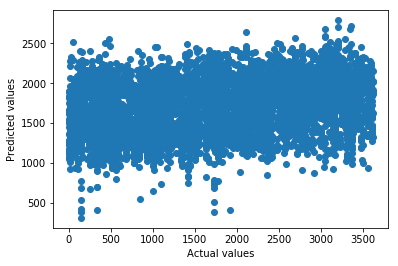

In [211]:

# Scatter plot of hp_target_test1 vs y 
plt.scatter(pd.DataFrame(hp_target_test1),Y)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

[(-500000, 500000)]

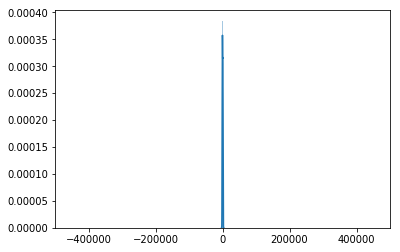

In [207]:
# Residual Histgram
lm = sns.distplot((pd.DataFrame(hp_target_test1)-Y),bins=50)
lm.set(xlim=(-500000, 500000))

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


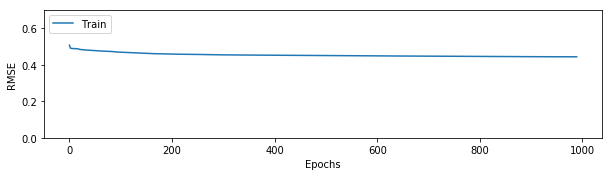

In [216]:
nn = NeuralNet([hp_features_train1.shape[1],20,1])
nn.train(np.array(hp_features_train1), np.array(hp_target_train1).reshape((hp_target_train1.shape[0],1)),ftracep=True)
Ytest, Z = nn.use(hp_features_test1, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

C:\Users\Manisha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


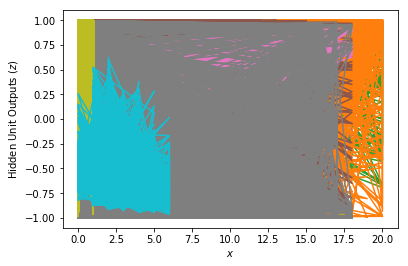

In [217]:
plt.plot(np.array(hp_features_test1), Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

C:\Users\Manisha\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Actual and Predicted $f(x)$')

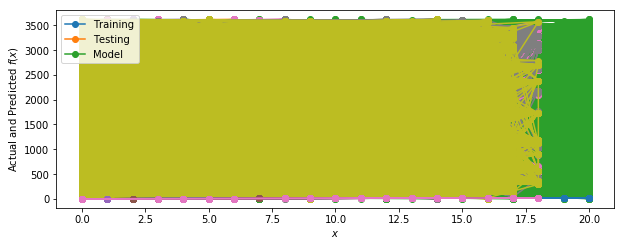

In [210]:
npXTrain = np.float64(hp_features_test1)
npXTest = np.float64(hp_features_test1)
npYTrain = np.float64(hp_features_test1)
npYTest = np.float64(hp_features_test1)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)


plt.subplot(2,1,1)
plt.plot(X,T,'o-',npXTrain,npYTrain,'o-',npXTest,npYTest,'o-')
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

In [67]:
bestAccuracy 

[976.9072375178913,
 1133.3581553768092,
 1109.69412807367,
 1100.5109546073909,
 1109.1665802262587]

In [68]:
bestParam

[[9, 3, 1], [9, 30, 1], [9, 30, 1], [9, 30, 1], [9, 30, 1]]

* From the above result, it is observed that model [9,30,1] appears as the best model in 4 out of 5 folds . 
* Hence, model with 9 input nodes, 30 hidden layers and 1 output node performs well on my data.
* On training the data with this structure , my r2 score has increased from 0.07 to 0.13.

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

* In this assignment, Neural Netwoks has been used to perform regression analysis which is a non linear regression model. Previously, we have used LinearRegress and LMS (Least Mean Square model ) to train the same data.
* By comparing the Linear Regression Models and Neural Network Model, I have observed that Neural Netwoks has performed slightly better than both LinearRegress and LMS models. While training the model using Least squares and Lms , i got r2 score of 0.05 and 0.02 respectively.
* In this assignment, whenIi built a model using neural network with the following structure, i got r2 score of 0.07 which shows that the neural network model performs better than the linear regression model on the same data.
* Forward -processing and backward-propogation also helps to find the best weights of the neural network associated with the data.

# Nonlinear Logistic Regression

Logistic Regression is used to classify the data, i.e., the outcome of the logistic regression are probablities of the samples that it belongs to a particular class. Using Logistic Regression in Neural Network makes the linearity of the neural network to non linear i.e., because of the curvature of the logistic sigmoid function or softmax that is used as activation function in the hidden layer the whole network becomes non linear. This helps in classifying the data that is not linearly seperable.


In [15]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """
    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = False

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
#                 t = self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
#         t, Z = super(NeuralNet, self).forward(X)
        G = self.softmax(t)
        return (G, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) 
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
#         print((np.sum(np.multiply(T, np.log(Y)))))
        return -(np.sum(np.multiply(T, np.log(Y)))  + wpenalty)
#         return - np.sum(np.sum(T*(np.log(Y))))+wpenalty
#         return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y


## Non Linear Logistic Regression

# Explanation of Codes

The *NeuralNetLogReg* implements a class from *nn.py* which is *NeuralNet* which inturn imports methods *scg*, *steepest* from grad.py and a class *Standardizer* from util.py. *scg* and *steepest* are optimizers for neural network.

*NeuralNetLogReg* contains methods init(), softmax(), g(), forward(), objectf(), train(), use(). In init() the super class init is initiaized i.e. init of NeuralNet. The forward function that is implemented from the NeuralNet class is overriden as Logistic Regression need to applied i.e. softmax() instead of tanh(). objectf(), train() and use() functions are also overriden. objectf() in NeuralNet return the mean square error whereas the overriden method returns the error calculated from logistic regression prediction. train() calls the NeuralNet train function. use() is overriden because the probabilities are predicted and argmax for that need to be calculated.

A new function indicator_matrix is defined to convert the labels to indicator matrix. The function is applied to the ndarray with apply_along_axis function.

### Choice of Evaluation Metrix
To evaluate a machine learning model is critical for the choice of right tools and performance. There are several classification measurements to meet different needs for practical applications. In this section, we examine popular measures.

### Confusion matrix
Each row in this matrix represents the predictions from model and column represents the actual classes
-	True Negative (TN)	
-   False Positive (FP)
-	False Negative (FN)	
-   True Positive (TP)
###  Precision:
The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct.
$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
### Recall:
Recall is also known as Sensitivity or True Positive Rate
This measure give you how the model's prediction covers the positive class.
$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
### Specificity: 
Specificity is the measure of the true negative rate.
Considering imblance or difference in class, we consider TNR as well.
$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$
ROC AUC Score
The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve.
### Error:
Error calculates the overall wrong predictions from the total data.
$$
\text{error} = \frac{\text{FP} + \text{FN}}{\text{TP} + \text{FN} + \text{FP} + \text{TN} }
$$

### Accuracy:
$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$
### F1 Score:
It provides the harmonic mean of precision and recall.

$$
\begin{align*}
F_1 &amp;= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &amp;= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &amp;= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$
F1 score favors the similar precision and recall values

In [126]:
def acc(cf):
    cf=np.array(cf)
    return (cf[1][1]+cf[0][0])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1])

def precision(cf):
    cf=np.array(cf)
    if cf[1][1] + cf[0][1] == 0 :
        return 0
    else:
        return cf[1][1]/(cf[1][1]+cf[0][1])
    
def recall(cf):
    cf=np.array(cf)
    if cf[1][1] + cf[1][0] == 0 :
        return 0
    else:
        return cf[1][1]/(cf[1][1]+cf[1][0])
    
def specificity(cf):
    cf=np.array(cf)
    if cf[0][0] + cf[0][1] == 0 :
        return 
    else:
        return cf[0][0]/(cf[0][0]+cf[0][1])
    
def error(cf):
    cf=np.array(cf)
    if cf[0][0] + cf[0][1] == 0 :
        return 
    else:
        return (cf[0][1]+cf[1][0])/(cf[0][0]+cf[1][0]+cf[0][1]+cf[1][1])
    

##  Examination of correct implementation (NonlinearLogReg) with toy data.

Text(0.5, 1.0, 'test data set')

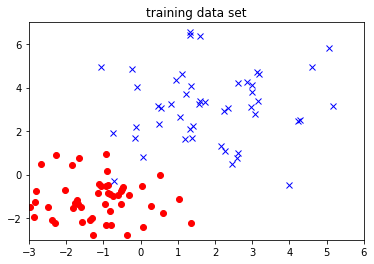

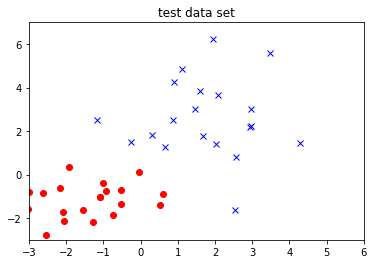

In [51]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [53]:
Ttrain.shape

(100, 1)

In [42]:
Ttest.shape

(40, 1)

In [60]:
nm = NeuralNetLogReg([2, 10, 13, 5, 2])
nm.train(Xtest, Ttest, ftracep=True) 
Ytest, Z = nm.use(Xtest, retZ=True)
Ytrain, Z = nm.use(Xtrain, retZ=True)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in exp
C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


In [61]:
Ytest = np.argmax(Ytest,1)
Ytest
Ytest = Ytest.reshape(Ytest.size,1)
Ytrain = np.argmax(Ytrain,1)
Ytrain = Ytrain.reshape(Ytrain.size,1)

In [63]:
Ytest=np.array(Ytest)
Ytrain=np.array(Ytrain)

In [66]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
conf_matrix_train = confusion_matrix(Ttrain,Ytrain )
conf_matrix_test = confusion_matrix(Ttest,Ytest )

In [67]:
print('Test Data Accuracy using  Algorithm:', acc(conf_matrix_test))

Test Data Accuracy using  Algorithm: 0.5


In [68]:
print('Train Data Accuracy using  Algorithm:', acc(conf_matrix_train))

Train Data Accuracy using  Algorithm: 0.5


In [69]:
print('Train Data error using  Algorithm:', error(conf_matrix_train))

Train Data error using  Algorithm: 0.5


## Test on my classification data

## Data
__The dataset taken is from kaggle .It consists of reviews of food from amazon. 
 Reviews include product and user information, ratings, and text review.
 Profile names and summary contain null values.
 The output for this data is classification. as we need to classify the data as to which score the custormer would give raging from 1 to 5 with 5 being the most like and 1 being the least liked.__
### Data includes:
- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews
- 
### The data set contains the following fields
 __Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text 
 IdRow Id__
- ProductId: Unique identifier for the product
- UserId: Unqiue identifier for the user
- ProfileName: Profile name of the user
- HelpfulnessNumerator: Number of users who found the review helpful
- HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not
- ScoreRating: between 1 and 5
- TimeTimestamp: for the review
- Summary: Brief summary of the review
- Text:Text of the review

In [70]:
import random


In [71]:
review=pd.read_csv("Reviews.csv")
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## DATA PRE_PROCESSING
- __Remove special characters from profile name__
- __Remove rows having null for profileName attibute__
- __Remove unnecessary punctuations from text__
- __Remove unnecessary punctuations from Summary__ 


In [72]:
review["ProfileName"] = review['ProfileName'].str.replace('"','')

In [73]:
#print cloumns which have missing profile names
null_data = review[review['ProfileName'].isnull()]
print(null_data[['ProfileName','Id','Score']])

       ProfileName      Id  Score
25509          NaN   25510      5
38874          NaN   38875      1
49800          NaN   49801      2
67077          NaN   67078      5
106550         NaN  106551      5
137613         NaN  137614      5
163191         NaN  163192      5
172462         NaN  172463      5
297275         NaN  297276      1
306751         NaN  306752      5
431598         NaN  431599      1
440825         NaN  440826      5
490412         NaN  490413      5
491728         NaN  491729      1
515436         NaN  515437      5
560446         NaN  560447      5


In [74]:
#Remove columns with Nan in profile name
review=review.dropna(subset=['ProfileName'])

In [75]:
review.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## Observations:
__the number of NA values in profile name are now 0 as we have deleted the rows which did not have profile name.__

In [76]:
review["Text_new"] = review['Text'].str.replace('[^\w\s]','')
review["Text_new"] = review['Text_new']

In [77]:
review["Summary"] = review['Summary'].str.replace('[^\w\s]','')

In [78]:
#remove puntuations from summary
print(review[['Summary']].head(5))

                 Summary
0  Good Quality Dog Food
1      Not as Advertised
2    Delight says it all
3         Cough Medicine
4            Great taffy


In [79]:
review.isna().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Text_new                   0
dtype: int64

__The number of rows that have NA is summary is 27. As having null in Summary might not effect the analysis much  so we can continue__

## Visualisation

In [80]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Review Score')

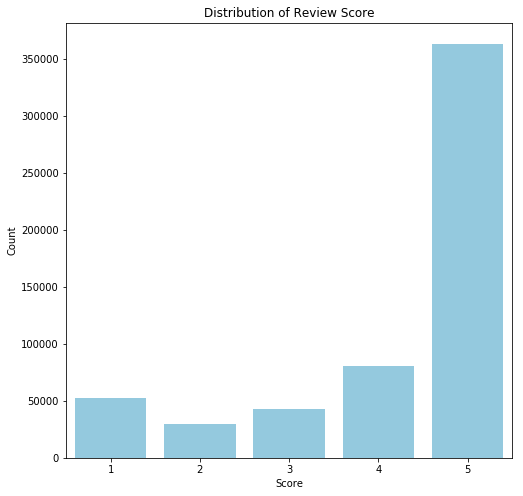

In [81]:
plt.figure(figsize=(8,8))
ax=sns.countplot(review['Score'],color='skyblue')
ax.set_xlabel("Score")
ax.set_ylabel('Count')
ax.set_title("Distribution of Review Score")

## Observations :
__maximum number of users have given a rating of 5. This pattern could be because of human tendecy to just rate 5 by default.
To know the score along with the usefulness we need to perform more visualisations using Helpfullness along with the score.__

In [82]:
# Create a list containing the average usefulness for given ratings
use_ls = []

for i in range(1, 6):
    use_ls.append([i, np.sum(review[review.Score == i].HelpfulnessDenominator) / np.sum([review.Score == i])])
    
use_arr = np.asarray(use_ls)

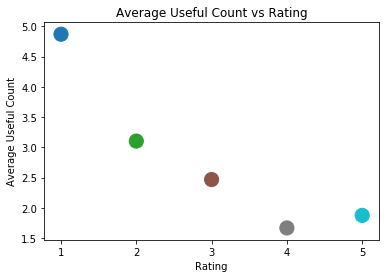

In [83]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 6)]);

## Observation:
__it can be noted that there are many users who found review score 1 more helpful.
could be that such reviews might have helped them to avoid a particular food.__

### top 5 persons whose reviews people have found most reviews.

In [84]:
useful=review.groupby('ProfileName')['HelpfulnessDenominator'].mean().reset_index().sort_values('HelpfulnessDenominator',ascending=False)

[Text(0, 0, 'BabbChuck BabbChuck'),
 Text(0, 0, 'P. Schmidt'),
 Text(0, 0, 'Benjamin Chodroff'),
 Text(0, 0, 'R. Hiltz'),
 Text(0, 0, 'ic ic')]

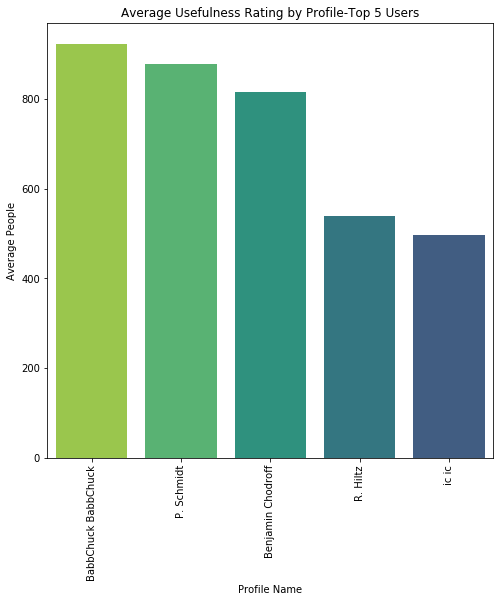

In [85]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x='ProfileName',y='HelpfulnessDenominator',data=useful[:5],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Average Usefulness Rating by Profile-Top 5 Users")
ax.set_xlabel("Profile Name")
ax.set_ylabel("Average People")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


## Observations
__user profile named BabbChunk has given the highest number of usefull ratings followed by P. Schmidt, Benjamin Chodroff, R.Hiitz and ic.__

### people who have given the most positive reviews

In [86]:
scores=review.groupby('ProfileName')['Score'].mean().reset_index().sort_values(by='Score',ascending=False)
scores.head()

,ProfileName,Score
109191,M. Field,5.0
125959,MyMarineRox,5.0
125946,MyB,5.0
125947,MyBB,5.0
125950,MyDogRunsMyLife,5.0


[Text(0, 0, 'M. Field'),
 Text(0, 0, 'MyMarineRox'),
 Text(0, 0, 'MyB'),
 Text(0, 0, 'MyBB'),
 Text(0, 0, 'MyDogRunsMyLife'),
 Text(0, 0, 'MyDogsBestFriend DonnaJean  McWhite'),
 Text(0, 0, 'MyGrnEyesF'),
 Text(0, 0, 'MyHumbleOpinion'),
 Text(0, 0, 'MyLoveIsBlind'),
 Text(0, 0, 'MyMelange')]

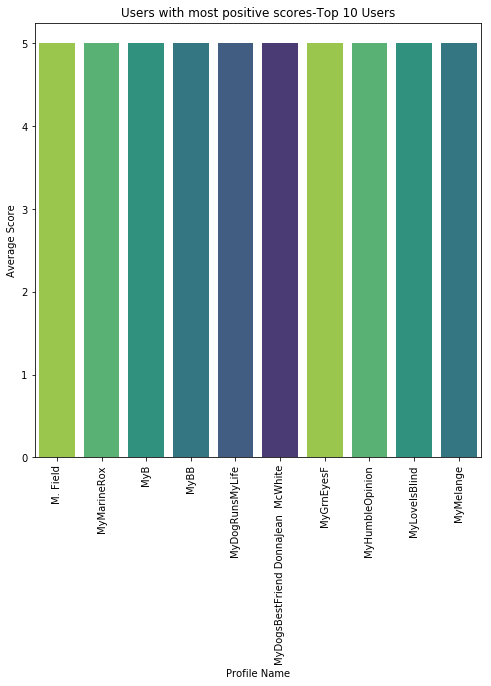

In [87]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x='ProfileName',y='Score',data=scores[:10],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Users with most positive scores-Top 10 Users")
ax.set_xlabel("Profile Name")
ax.set_ylabel("Average Score")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # rotates the names by 90

## Observation: 
__The plot tells us that on an average most of the users have written positive reviews__

In [88]:
df=review
df.loc[:, 'Helpful'] = np.where(df.loc[:, 'HelpfulnessNumerator'] / df.loc[:, 'HelpfulnessDenominator'] > 0.50, 1, 0)
df.head(10)
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Text_new                  object
Helpful                    int32
dtype: object

In [89]:
df['review_length']=df['Text_new'].str.len()

In [90]:
df.dropna(inplace=True)
df[df['Score'] != 3]
df['Positivity'] = np.where(df['Score'] > 3, 1, 0)

__As the data is very huge . We can take a sample of 10000 from the original data set.__

In [91]:
df=review.sample(10000)

In [92]:
target_log=df.iloc[:,-1]
feature_log=df.drop(['Positivity','Text_new','Text','Score','Id','ProductId','Summary','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator'],axis=1)
#features=X_train_vectorized.toarray()
#features.shape
target_log.shape

(10000,)

In [93]:
feature_log.shape


(10000, 3)

In [94]:
target = np.array(target_log).reshape(target_log.shape[0],1)
#feature = np.array(feature) 

feature_log.shape

(10000, 3)

In [96]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split

In [97]:
features_train, features_test, target_train, target_test = train_test_split(feature_log,target_log , test_size=0.3, random_state=40)

In [104]:
np.array(target_train).reshape((target_train.shape[0],1)).shape


(7000, 1)

In [105]:
np.array(target_test).reshape((target_test.shape[0],1)).shape

(3000, 1)

In [107]:
nm = NeuralNetLogReg([3, 26, 13, 5, 2])
nm.train(features_train, np.array(target_train).reshape((target_train.shape[0],1)), ftracep=True) 
Ytest, Ztest = nm.use(features_test, retZ=True)
Ytrain, Ztrain = nm.use(features_train, retZ=True)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in exp
C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


In [108]:
Ytest = np.argmax(Ytest,1)
Ytest = Ytest.reshape(Ytest.size,1)
Ytrain = np.argmax(Ytrain,1)
Ytrain = Ytrain.reshape(Ytrain.size,1)

In [109]:
Ytest=np.array(Ytest)
Ytrain=np.array(Ytrain)

In [110]:
np.array(target_test).reshape((target_test.shape[0],1)).shape
target_test=np.array(target_test)
target_test

array([1, 1, 1, ..., 1, 0, 1])

In [111]:
np.array(target_train).reshape((target_train.shape[0],1)).shape
target_train=np.array(target_train)
target_train

array([1, 1, 0, ..., 1, 1, 1])

In [113]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
conf_matrix_test = confusion_matrix(target_test,Ytest)
conf_matrix_train = confusion_matrix(target_train,Ytrain)

In [114]:
print('Train Data Accuracy using  Algorithm:', acc(conf_matrix_train))

Train Data Accuracy using  Algorithm: 0.5282857142857142


In [115]:
print('Error:', error(conf_matrix_train))

Error: 0.4717142857142857


In [116]:
print('Train Data Accuracy using  Algorithm:', acc(conf_matrix_test))

Train Data Accuracy using  Algorithm: 0.5226666666666666


In [117]:
print('Error:', error(conf_matrix_test))

Error: 0.47733333333333333


In [125]:
print('F1 score for test:', f1_score(target_test,Ytest))

F1 score: 0.6505612493899463


In [131]:
print('F1 score for train:', f1_score(target_train,Ytrain))

F1 score for train: 0.6561849229487714


In [127]:
print('Precision:', precision(conf_matrix_test))

Precision: 0.7647733792312106


In [128]:
print('Recall:', recall(conf_matrix_test))

Recall: 0.5660297239915074


In [130]:
print('Specificty:', specificity(conf_matrix_test))

Specificty: 0.3643410852713178


## Plots for Logistic Linear Regression

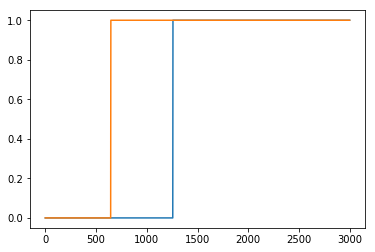

In [119]:
plt.plot(np.sort(Ytest,0))
plt.plot(np.sort(target_test,0))

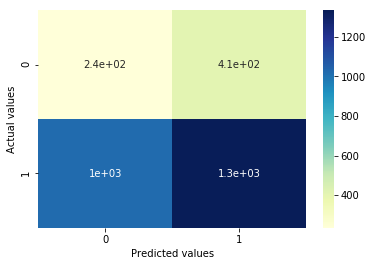

In [120]:
import seaborn as sb
ax= plt.subplot()
sb.heatmap(conf_matrix_test, annot=True, ax = ax,cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted values');
ax.set_ylabel('Actual values');

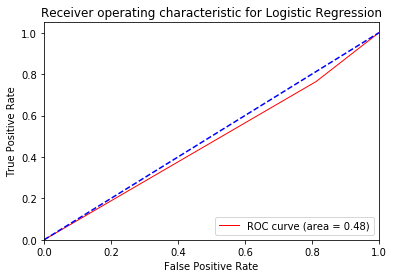

In [121]:
# AUC Curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Ytest,target_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

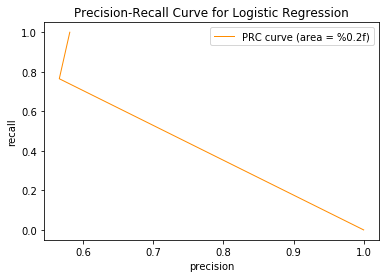

In [123]:
# Precision-Recall Curve for Logistic Regression
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Ytest,target_test)
plt.figure()
plt.plot(precision, recall, color='darkorange', lw=1, label='PRC curve (area = %0.2f)')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="upper right")
plt.show()

## Discussions about  parameters of model 

This algorithm is an average linear regression model for identifying the classes.My data is has an aproximate accuracy of 50% for this model.Other algorithms such as Pocket, LDa etc had better performence for my data set. 

Train Accuracy : 52.8% <br/> 
Test Accuracy : 52.2 <br/>
F1 Score : 0.65 <br/>
Precision : 0.76 <br/>
Recall : 0.56 <br/>
Error : 0.47 <br/>
Specificity : 0.36 <br/>

## Parameters and Network Structure choice

##### rmse:
This parameter defines Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

##### Accuracy: 
This is a regularization coefficient that reduces overfitting. Lesser the value, more accuracy is achieved. 

### Network Structure:

For nonlinear regression model, I have used 5 hidden layers. From Prelimary test, we have identified that Non-Linear Logistic model is implemented correctly. 5 hidden layers are used for having better accuracy.

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

* In this assignment, Neural Netwoks has been used to perform regression analysis which is a non linear regression model. Previously, we have used LinearRegress and LMS (Least Mean Square model ) to train the same data.
* By comparing the Linear Regression Models and Neural Network Model, I have observed that Neural Netwoks has performed slightly better than both LinearRegress and LMS models. While training the model using Least squares and Lms , i got r2 score of 0.05 and 0.02 respectively.
* In this assignment, whenIi built a model using neural network with the following structure, i got r2 score of 0.07 which shows that the neural network model performs better than the linear regression model on the same data.
* Forward -processing and backward-propogation also helps to find the best weights of the neural network associated with the data.

## Conclusion

- In this assignment , I have learned how Neural network works to build a regression model and nonlinear logistic regression work. I also learnt the powerfullness of  neural networks in comparision to  other regression models and the reason behind it.I have also got clear understanding of some of the important concepts like Feed forward networks, back propogation , activation functions, optimization measures and their uses in building the neural networks.
- I have also learnt how to implement cross validation from scratch and also got a clear idea on the principle involved to implement it. I have used 5 fold cross validation to determine the  best Neural network model for my data.

__Challenge__ I faced problems while implementing cross validation for the Neural network. Simce i was unclear on how k - folds work and was also confused on the value we need to take for k.Another challenge I have faced was with respect to the accuracy of the regression model as my data did not fit the previous regression models as well.Hence the r2 value has improved but the imporvement is not verey huge.

## References
 - Dataset Information, https://www.kaggle.com/mehdidag/black-friday
 - Dataset Information, https://www.kaggle.com/snap/amazon-fine-food-reviews/home
 - Few ideas for visualization from https://www.kaggle.com/mehdidag/black-friday/kernels  
 - few ideas for visualization from https://www.kaggle.com/gsdeepakkumar/text-analysis-on-fine-foods-review
 - Basics of python https://www.tutorialspoint.com/python/
 - Visualizing Https://Matplotlib.org/
 - Seaborn.pydata.org/tutorial/distributions.html.
 - https://stackoverflow.com/questions/41494358/spyder-python-object-arrays-are-currently-not-supported
 - http://scipy-lectures.org/packages/scikit-learn/index.html
 - “LaTeX/Mathematics.” , en.wikibooks.org/wiki/LaTeX/Mathematics.
 - AUC Curve: https://qiita.com/bmj0114/items/460424c110a8ce22d945
 - Cross validation : https://www.youtube.com/watch?v=e0JcXMzhtdY
 - Gradient descent : https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f